In [3]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import cv2
import sys
import os
import copy

# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


load image from camera 0

In [4]:
color_raw_0 = o3d.io.read_image('./dataset/realsense/color/cam0_0.png')
depth_raw_0 = o3d.io.read_image('./dataset/realsense/depth/cam0_0.png')
rgbd_image_0 = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw_0, depth_raw_0)
print(rgbd_image_0)

RGBDImage of size 
Color image : 2448x2048, with 1 channels.
Depth image : 2448x2048, with 1 channels.
Use numpy.asarray to access buffer data.


load image from camera 1

In [5]:
color_raw_1 = o3d.io.read_image('./dataset/realsense/color/cam1_0.png')
depth_raw_1 = o3d.io.read_image('./dataset/realsense/depth/cam1_0.png')
rgbd_image_1 = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw_1, depth_raw_1)
print(rgbd_image_1)

RGBDImage of size 
Color image : 2448x2048, with 1 channels.
Depth image : 2448x2048, with 1 channels.
Use numpy.asarray to access buffer data.


show images

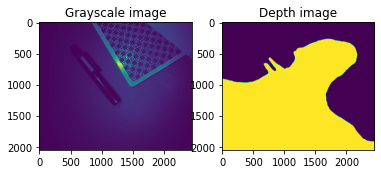

In [6]:
plt.subplot(1 ,2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image_0.color)
plt.subplot(1 ,2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image_0.depth)

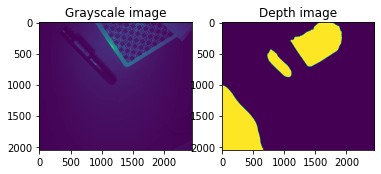

In [7]:
plt.subplot(1 ,2, 1)
plt.title('Grayscale image')
plt.imshow(rgbd_image_1.color)
plt.subplot(1 ,2, 2)
plt.title('Depth image')
plt.imshow(rgbd_image_1.depth)

load intrinsic parameters for camera 0

In [8]:
# Camera intrinsic parameters built into Open3D for Prime Sense
w0 = 2480
h0 = 2048
fx0 = 3.40279761e+03
fy0 = 3.41122021e+03
cx0 = 1.24198049e+03
cy0 = 1.08247093e+03
intrinsic_0 = o3d.camera.PinholeCameraIntrinsic(w0, h0, fx0, fy0, cx0, cy0)
print(intrinsic_0.intrinsic_matrix)

[[3.40279761e+03 0.00000000e+00 1.24198049e+03]
 [0.00000000e+00 3.41122021e+03 1.08247093e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


load intrincis parameters for camera 1

In [9]:
# Camera intrinsic parameters built into Open3D for Prime Sense
w1 = 2480
h1 = 2048
fx1 = 3.39971924e+03
fy1 = 3.42846045e+03 
cx1 = 1.25542657e+03
cy1 = 1.05306074e+03
intrinsic_1 = o3d.camera.PinholeCameraIntrinsic(w1, h1, fx1, fy1, cx1, cy1)
print(intrinsic_1.intrinsic_matrix)

[[3.39971924e+03 0.00000000e+00 1.25542657e+03]
 [0.00000000e+00 3.42846045e+03 1.05306074e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


create point cloud camera 0

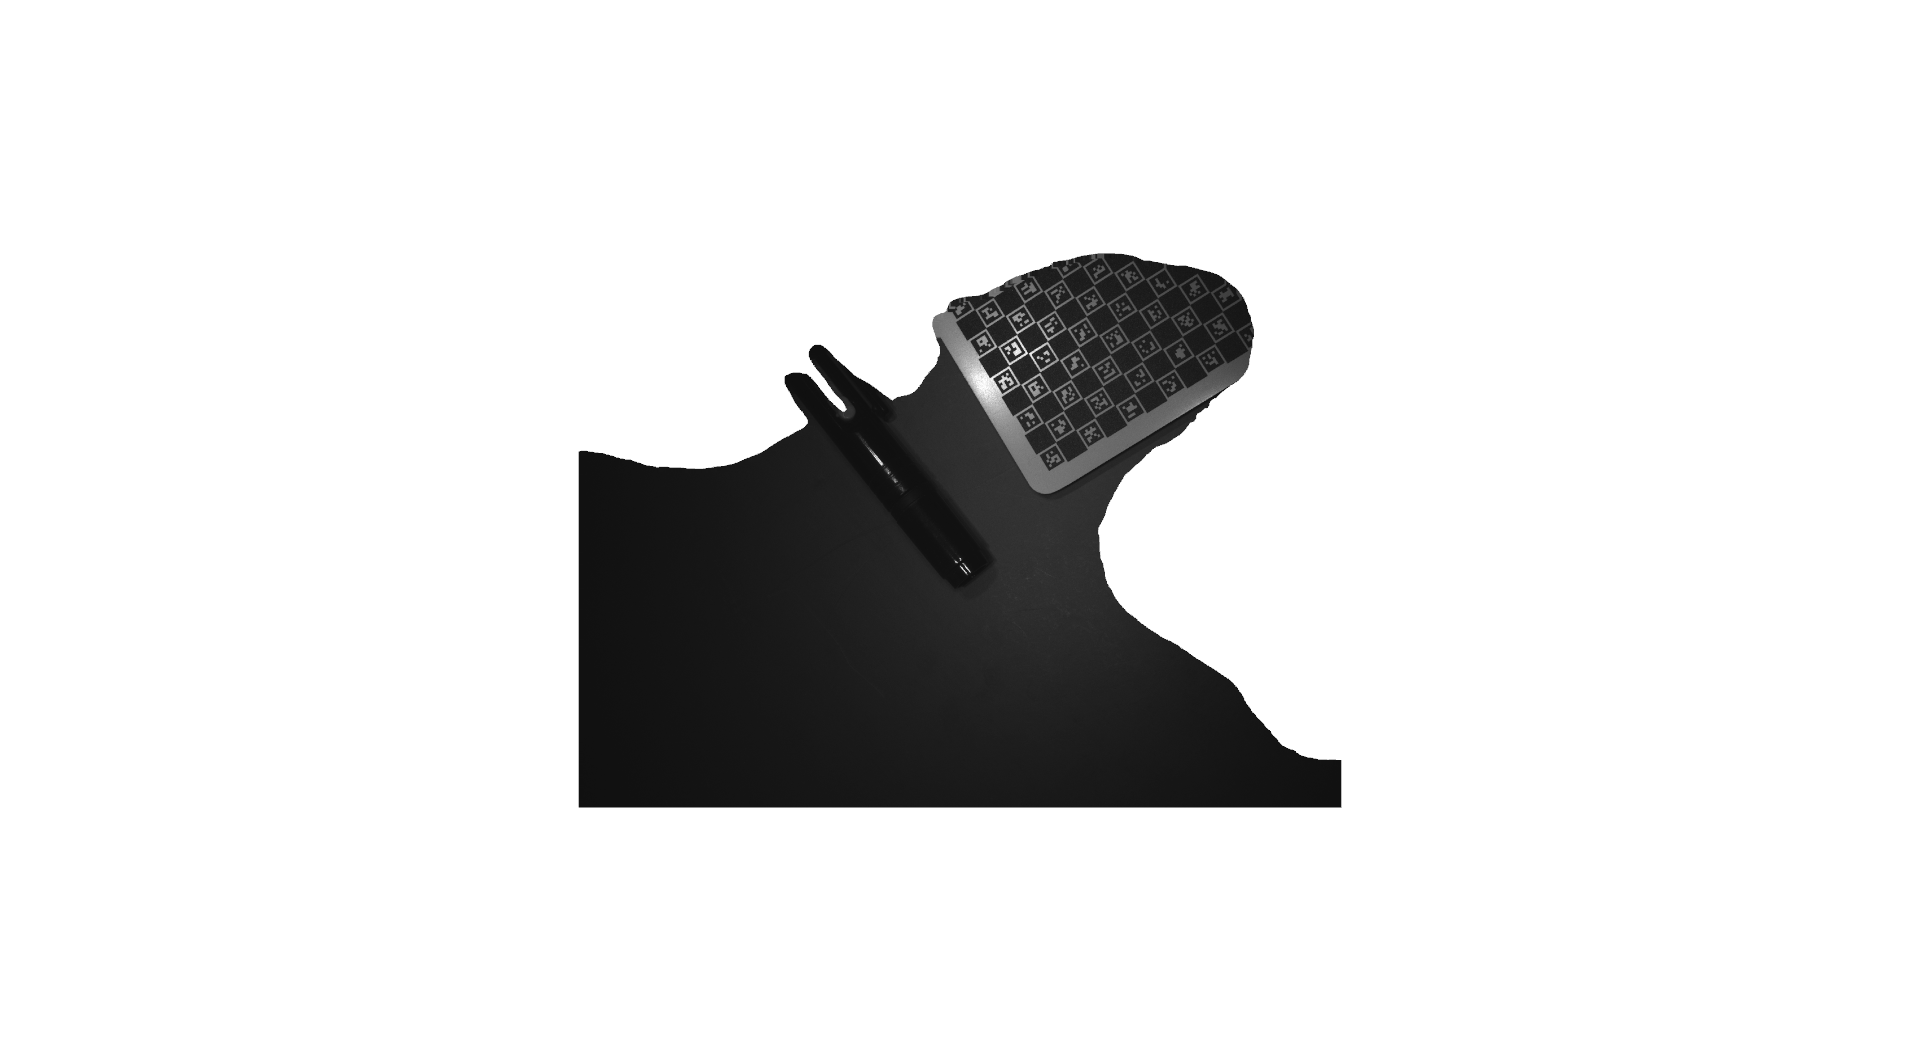

In [10]:
# Create the point cloud from images and camera intrisic parameters
pcd0 = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image_0, intrinsic_0)

# Flip it, otherwise the pointcloud will be upside down
pcd0.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd0], mesh_show_back_face=True)
# o3d.visualization.draw_geometries([pcd0], zoom=1.0,
#                                   window_name='pcd1',
#                                   front=[0.4257, -0.2125, -0.8795],
#                                   lookat=[2.6172, 2.0475, 1.532],
#                                   up=[-0.0694, -0.9768, 0.2024])

create point cloud camera 1

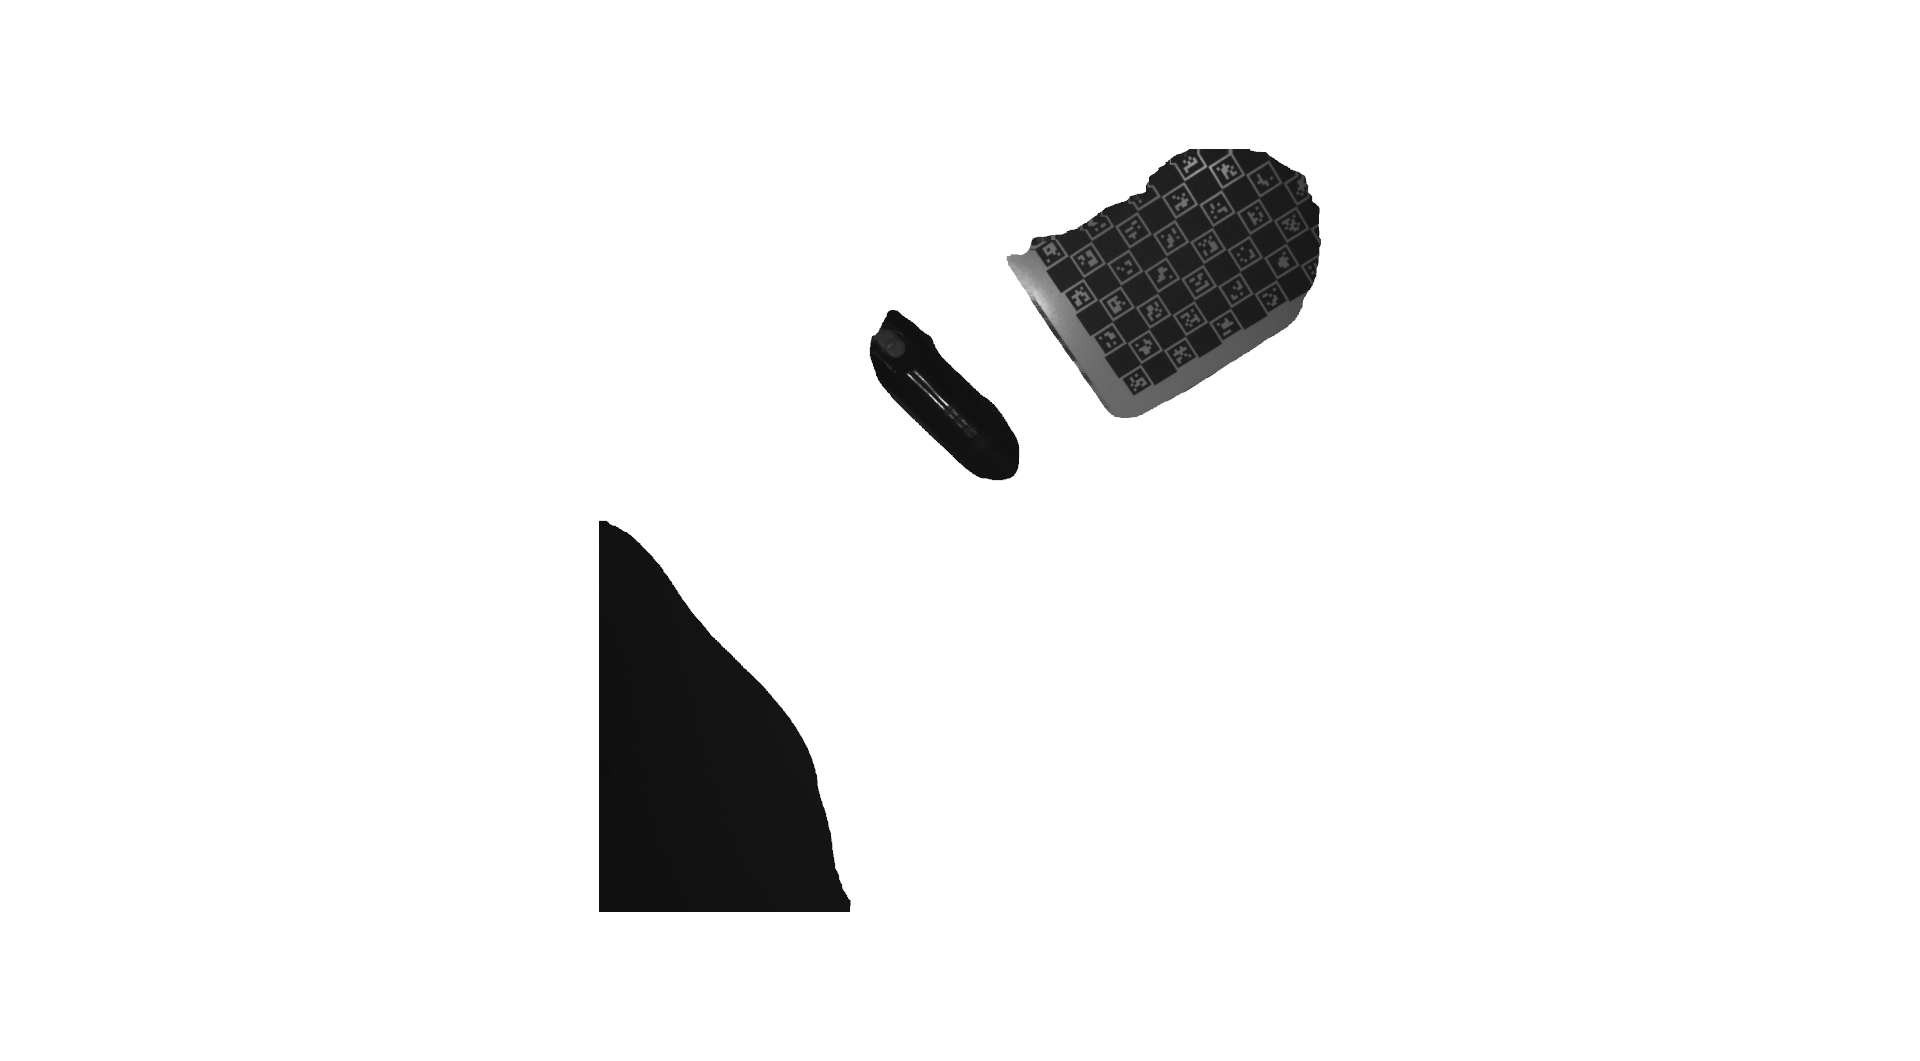

In [11]:
# Create the point cloud from images and camera intrisic parameters
pcd1 = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image_1, intrinsic_1)
    
# Flip it, otherwise the pointcloud will be upside down
pcd1.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd1], point_show_normal=True)

In [12]:
# def draw_registration_result_original_color(source, target, transformation):
#     source_temp = copy.deepcopy(source)
#     source_temp.transform(transformation)
#     o3d.visualization.draw_geometries([source_temp, target],
#                                       zoom=1,#, zoom = 1 means no zoom
#                                     #  front=[0.0288, 0.0951, 0.2242])#,
#                                       lookat=[1.6784, 2.0612, 1.4451])#,
#                                     #   up=[-0.3402, -0.9189, -0.1996])

In [14]:
def draw_registration_result_original_color(source, target, transformation):
    flip_transform = [[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]]
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.transform(transformation)
    source_temp.transform(flip_transform)
    target_temp.transform(flip_transform)
    o3d.visualization.draw_geometries([source_temp, target_temp])

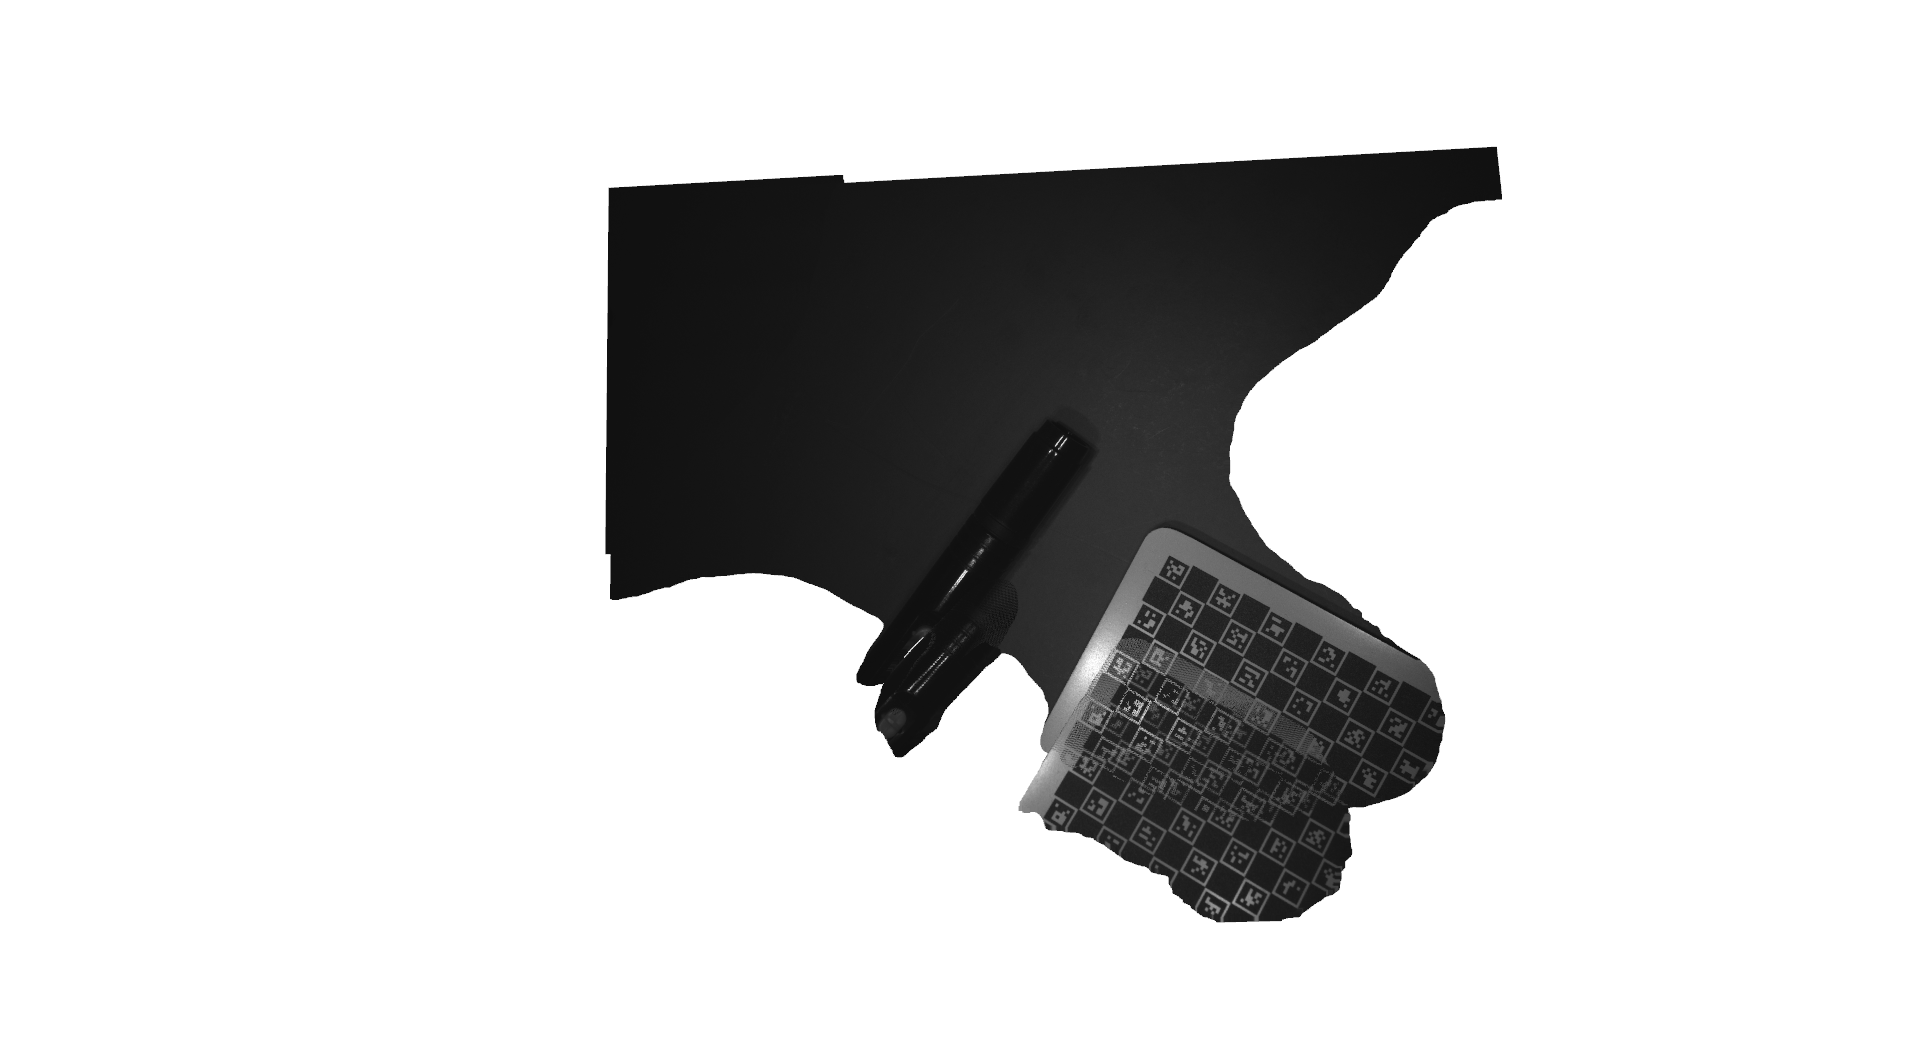

In [15]:
# draw initial alignment
current_transformation = np.identity(4)
# current_transformation = np.asarray([[1.0, 0, 0.0, 0.0],
#                                      [0.0, 1.0, 0.0, 0.0],
#                                      [0.0, 0.0, 1.0, 0.0], 
#                                      [0.0, 0.0, 0.0, 1.0]])

# draw_registration_result_original_color(source, target, current_transformation)
draw_registration_result_original_color(pcd0, pcd1, current_transformation)

The function `eveluate_registration` calculate two main metrics:

* fitness, which measures the overlapping area (# of inlier correspondences / # of points in target). The higher the better.

* inlier_rmse, which measures the RMSE of all inlier correspondences. The lower the better.

In [ ]:
print("Initial alignment")
threshold = 0.02
evaluation = o3d.pipelines.registration.evaluate_registration(
    pcd0, pcd1, threshold, current_transformation)
print(evaluation)

Initial alignment
RegistrationResult with fitness=1.000000e+00, inlier_rmse=1.408462e-07, and correspondence_set size of 1101457
Access transformation to get result.


### Point-To-plane ICP (Iterative Closest Point)

In [ ]:
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0]) # desable the color
    target_temp.paint_uniform_color([0, 0.651, 0.929]) # desable the color
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp],
                                      zoom=1.0) # 0.4459)#,
                                    #   front=[0.9288, -0.2951, -0.2242],
                                    #   lookat=[1.6784, 2.0612, 1.4451],
                                    #   up=[-0.3402, -0.9189, -0.1996])

Apply point-to-point ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=1.140764e-07, and correspondence_set size of 1101457
Access transformation to get result.
Transformation is:
[[ 9.99774563e-01  2.12326159e-02  0.00000000e+00 -2.28389676e-09]
 [-2.12326159e-02  9.99774563e-01  0.00000000e+00  6.16441188e-08]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


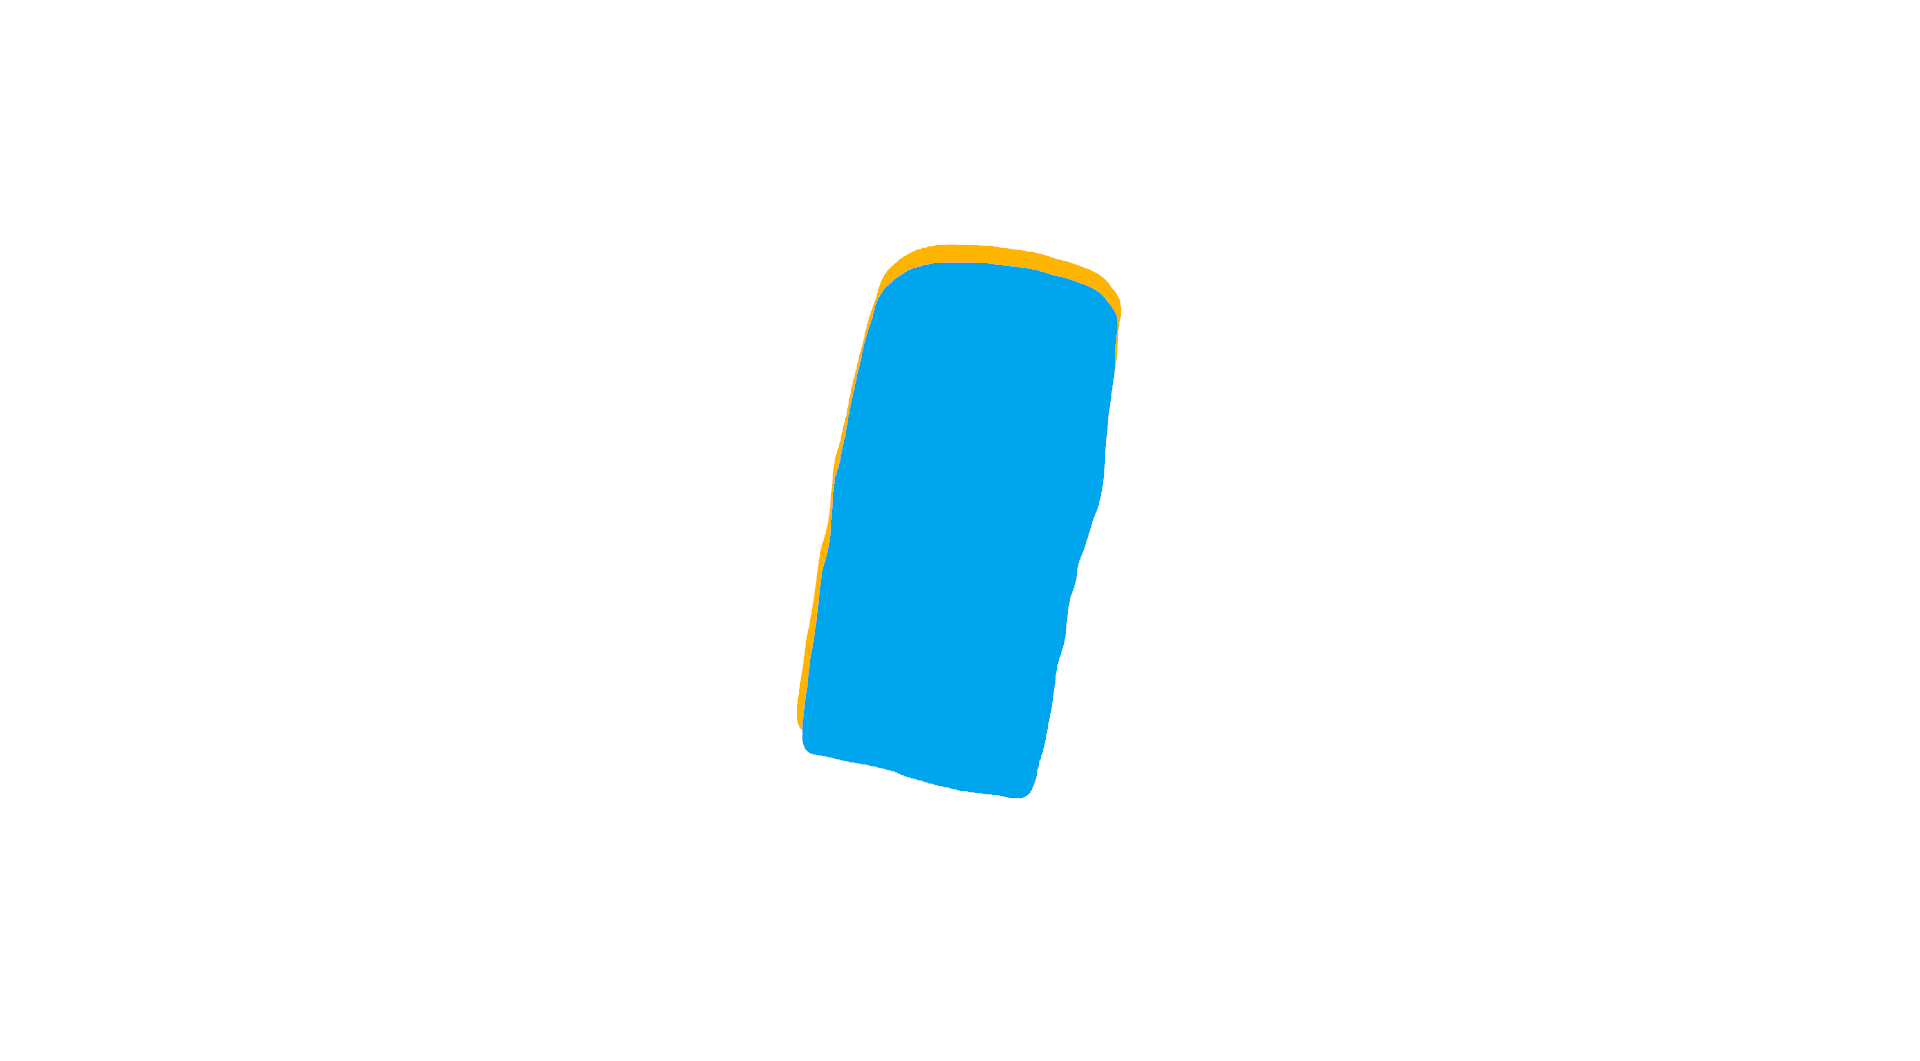

: 

In [ ]:
print("Apply point-to-point ICP")
reg_p2p = o3d.pipelines.registration.registration_icp(
    pcd0, pcd1, threshold, current_transformation,
    o3d.pipelines.registration.TransformationEstimationPointToPoint())
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)
draw_registration_result(pcd0, pcd0, reg_p2p.transformation)